In [340]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [8, 4]
import numpy as np
import pandas as pd

'''Horizontally oriented laser'''
df_h = pd.read_csv('HorizontalLaserProfileCSV06_08_2021.csv')
xData_h = df_h['x']
xErr_h = df_h['x_u']
yData_h = df_h['y']
yErr_h = df_h['y_u']
# x: Displacement of razor (inches)
# x_u: Uncertainty in displacement (inches)
# y: Current output due to laser (micro-Amperes)
# y_u: Uncertainty in current (micro-Amperes)
df_h

,x,x_u,y,y_u
0,0.150,0.0005,1407.8,1.004988
1,0.155,0.0005,1407.8,1.004988
2,0.160,0.0005,1407.8,1.004988
3,0.165,0.0005,1407.8,1.004988
4,0.170,0.0005,1407.8,1.004988
...,...,...,...,...
58,0.440,0.0005,0.0,0.141421
59,0.445,0.0005,0.0,0.141421
60,0.450,0.0005,0.0,0.141421
61,0.455,0.0005,0.0,0.141421


In [341]:
'''Vertically oriented laser'''
df_v = pd.read_csv('VerticalLaserProfileCSV06_08_2021.csv')
xData_v = df_v['x']
xErr_v = df_v['x_u']
yData_v = df_v['y']
yErr_v = df_v['y_u']
# x: Displacement of razor (inches)
# x_u: Uncertainty in displacement (inches)
# y: Current output due to laser (micro-Amperes)
# y_u: Uncertainty in current (micro-Amperes)
df_v

,x,x_u,y,y_u
0,0.225,0.0005,1408.9,1.004988
1,0.230,0.0005,1409.9,1.004988
2,0.235,0.0005,1410.9,1.004988
3,0.240,0.0005,1411.9,1.004988
4,0.245,0.0005,1412.9,1.004988
5,0.250,0.0005,1413.9,1.004988
6,0.255,0.0005,1414.9,1.004988
7,0.260,0.0005,1414.9,1.004988
8,0.265,0.0005,1413.9,1.004988
9,0.270,0.0005,1414.9,1.004988


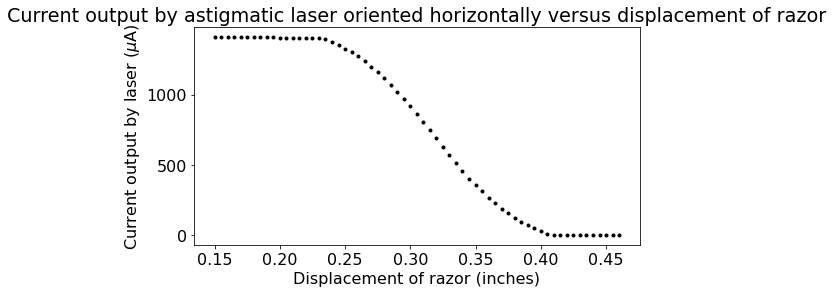

In [342]:
'''Plotting horizontally oriented laser data'''
plt.errorbar(xData_h, yData_h, xerr = xErr_h, yerr = yErr_h, fmt = '.k')
plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current output by astigmatic laser oriented horizontally versus displacement of razor')
plt.show()

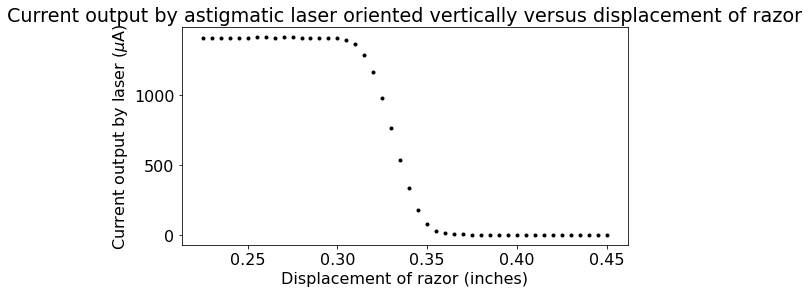

In [343]:
'''Plotting vertically oriented laser data'''
plt.errorbar(xData_v, yData_v, xerr = xErr_v, yerr = yErr_v, fmt = '.k')
plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current output by astigmatic laser oriented vertically versus displacement of razor')
plt.show()

In [344]:
# Univeral domain of graphs:
x = np.linspace(0.150, 0.460, 200)

a_h = 708.3, b_h = 15.48, c_h = 4.925
Standard deviations: σa_h = 1.61, σb_h = 0.14, σc_h = 0.047


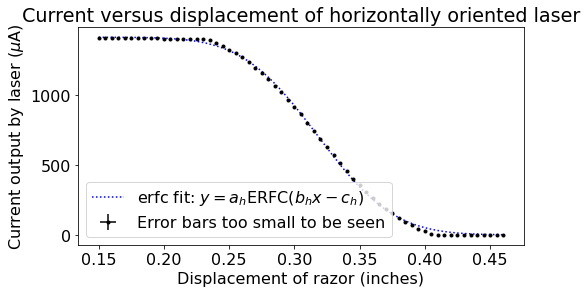

In [345]:
from scipy import special
from scipy.optimize import curve_fit

'''Fit ERFC for horizontally oriented laser data'''
def fit_function(x, a_h, b_h, c_h):
    return a_h * special.erfc(b_h * x - c_h)

popt_h, pcov_h = curve_fit(fit_function, xData_h, yData_h, bounds = ([700, 9, -5], [720, 50, 5]))

# Values of parameters
value_h = tuple(popt_h)
print(f'a_h = {value_h[0]:{1}.{5}}, b_h = {value_h[1]:{1}.{4}}, c_h = {value_h[2]:{1}.{4}}')

# Standard deviation of parameters
stdD_h = tuple(np.sqrt(np.diag(pcov_h)))
print(f'Standard deviations: σa_h = {stdD_h[0]:{1}.{3}}, σb_h = {stdD_h[1]:{1}.{2}}, σc_h = {stdD_h[2]:{1}.{2}}')

plt.errorbar(xData_h, yData_h, xerr = xErr_h, yerr = yErr_h, fmt = '.k',
            label = 'Error bars too small to be seen')

plt.plot(x, fit_function(x, *popt_h), 'b:',
        label = r'erfc fit: $y = a_{h} $ERFC$\left(b_{h} x - c_{h}\right)$')

plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current versus displacement of horizontally oriented laser')
plt.legend()
plt.show()

a_v = 706.78, b_v = 58.76, c_v = 19.47
Standard deviations: σa_v = 0.292, σb_v = 0.18, σc_v = 0.059


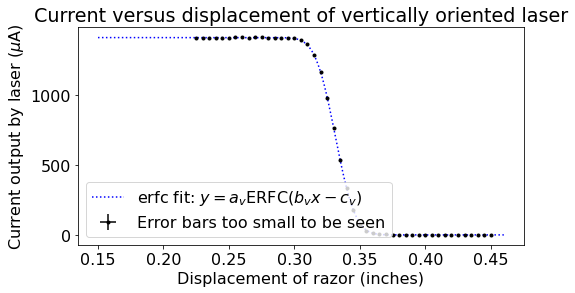

In [346]:
'''Fit ERFC for vertically oriented laser data'''
def fit_function(x, a_v, b_v, c_v):
    return a_v * special.erfc(b_v * x - c_v)

popt_v, pcov_v = curve_fit(fit_function, xData_v, yData_v, bounds = ([700, 15, 5], [720, 100, 50]))

# Values of parameters
value_v = tuple(popt_v)
print(f'a_v = {value_v[0]:{1}.{5}}, b_v = {value_v[1]:{1}.{4}}, c_v = {value_v[2]:{1}.{4}}')

# Standard deviation of parameters
stdD_v = tuple(np.sqrt(np.diag(pcov_v)))
print(f'Standard deviations: σa_v = {stdD_v[0]:{1}.{3}}, σb_v = {stdD_v[1]:{1}.{2}}, σc_v = {stdD_v[2]:{1}.{2}}')

plt.errorbar(xData_v, yData_v, xerr = xErr_v, yerr = yErr_v, fmt = '.k',
            label = 'Error bars too small to be seen')

plt.plot(x, fit_function(x, *popt_v), 'b:',
         label = r'erfc fit: $y = a_{v} $ERFC$\left(b_{v} x - c_{v}\right)$')

plt.xlabel('Displacement of razor (inches)')
plt.ylabel('Current output by laser ($\mu$A)')
plt.title('Current versus displacement of vertically oriented laser')
plt.legend(loc=3)
plt.show()

A_h = 12376.07, B_h = 15.5, C_h = 4.925
Standard deviations: σA_h = 116.72, σB_h = 0.1, σC_h = 0.047


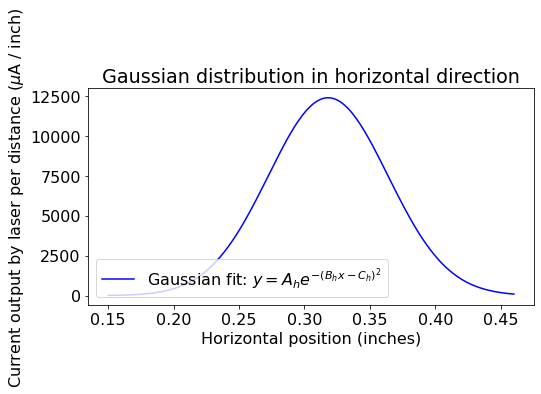

In [347]:
'''Gaussian beam power - horizontal'''

# Assigns values of parameters and std.d of erfc to variables
a_h, b_h, c_h = tuple(popt_h)
aErr_h, bErr_h, cErr_h = stdD_h

# Calculates parameters of Gaussian distribution
A_h = 2 * a_h * b_h / np.sqrt(np.pi)
B_h = b_h
C_h = c_h
# Creating a tuple
coe_h = A_h, B_h, C_h
print(f'A_h = {coe_h[0]:{1}.{7}}, B_h = {coe_h[1]:{1}.{3}}, C_h = {coe_h[2]:{1}.{4}}')

# Calculates standard deviations of parameters of Gaussian distribution
AErr_h = A_h * np.sqrt((aErr_h / a_h) ** 2 + (bErr_h / b_h) ** 2)
BErr_h = bErr_h
CErr_h = cErr_h
coeErr_h = AErr_h, BErr_h, CErr_h
print(f'Standard deviations: σA_h = {coeErr_h[0]:{1}.{5}}, σB_h = {coeErr_h[1]:{1}.{1}}, σC_h = {coeErr_h[2]:{1}.{2}}')

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b',
          label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$')

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 3)
plt.show()

A_v = 46864.59, B_v = 58.8, C_v = 19.47
Standard deviations: σA_v = 143.14, σB_v = 0.2, σC_v = 0.059


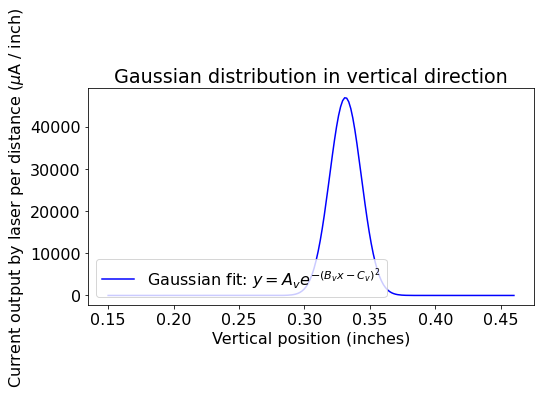

In [348]:
'''Gaussian beam power - vertical'''

# Assigns values of parameters and std.d of erfc to variables
a_v, b_v, c_v = tuple(popt_v)
aErr_v, bErr_v, cErr_v = stdD_v

# Calculates parameters of Gaussian distribution
A_v = 2 * a_v * b_v / np.sqrt(np.pi)
B_v = b_v
C_v = c_v
# Creating a tuple
coe_v = A_v, B_v, C_v
print(f'A_v = {coe_v[0]:{1}.{7}}, B_v = {coe_v[1]:{1}.{3}}, C_v = {coe_v[2]:{1}.{4}}')

# Calculates standard deviations of parameters of Gaussian distribution
AErr_v = A_v * np.sqrt((aErr_v / a_v) ** 2 + (bErr_v / b_v) ** 2)
BErr_v = bErr_v
CErr_v = cErr_v
coeErr_v = AErr_v, BErr_v, CErr_v
print(f'Standard deviations: σA_v = {coeErr_v[0]:{1}.{5}}, σB_v = {coeErr_v[1]:{1}.{1}}, σC_v = {coeErr_v[2]:{1}.{2}}')

plt.plot(x, A_v * np.exp(-(B_v * x - C_v) ** 2), 'b',
          label= r'Gaussian fit: $y = A_{v} e^{-\left(B_{v} x - C_{v}\right)^{2}}$')

plt.xlabel('Vertical position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in vertical direction')
plt.legend(loc = 3)
plt.show()

# Numerical differentiation of discrete data and then comparing it to expected Gaussian from ERFC fit parameters
## --Using forward difference
$f′(x_j)=\frac{f(x_{j+1})−f(x_j)}{x_{j+1}−x_j}$

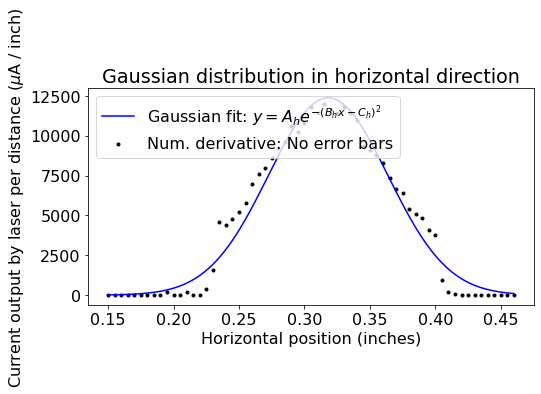

In [349]:
'''Numerical differentiation of ERFC - Horizontal'''

# Using forward difference numerical derivative
### No right endpoint

forwardD_h = [0.0] * len(xData_h)
for i in range (len(yData_h) - 1):
    forwardD_h[i] = -1 * (yData_h[i + 1] - yData_h[i])/(xData_h[i + 1] - xData_h[i])
# forwardD_h[-1] = (yData_h[-1] - yData_h[-2])/(xData_h[-1] - xData_h[-2])

plt.scatter(xData_h, forwardD_h, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b'
          ,label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 2)
plt.show()

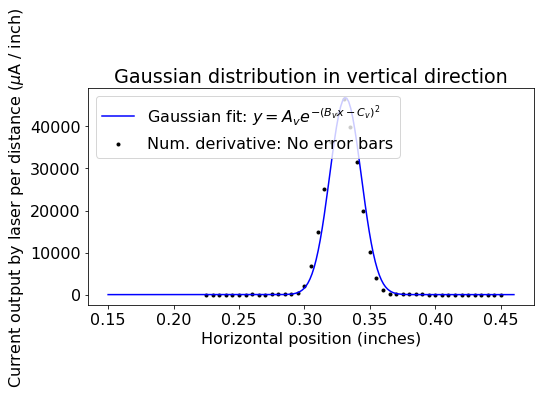

In [350]:
'''Numerical differentiation of ERFC - Vertical'''

# Using forward difference numerical derivative
### No right endpoint

forwardD_v = [0.0] * len(xData_v)
for i in range (len(yData_v) - 1):
    forwardD_v[i] = -1 * (yData_v[i + 1] - yData_v[i])/(xData_v[i + 1] - xData_v[i])
# forwardD_v[-1] = (yData_v[-1] - yData_v[-2])/(xData_v[-1] - xData_v[-2])

plt.scatter(xData_v, forwardD_v, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_v * np.exp(-(B_v * x - C_v) ** 2), 'b'
         ,label= r'Gaussian fit: $y = A_{v} e^{-\left(B_{v} x - C_{v}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in vertical direction')
plt.legend(loc = 2)
plt.show()

## --Using backward difference
$f′(x_j)=\frac{f(x_j)-f(x_{j-1})}{x_j-x_{j-1}}$

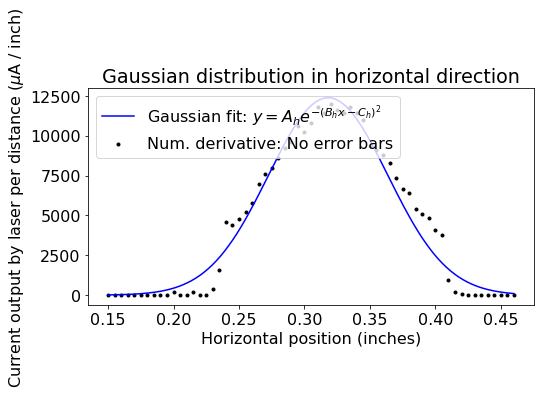

In [351]:
'''Numerical differentiation of ERFC - Horizontal'''

# Using backward difference numerical derivative

backwardD_h = [0.0] * len(xData_h)
backwardD_h[0] = (yData_h[1] - yData_h[0])/(xData_h[1] - xData_h[0])
for i in range (1, len(yData_h)):
    backwardD_h[i] = -1 * (yData_h[i] - yData_h[i - 1])/(xData_h[i] - xData_h[i - 1])

plt.scatter(xData_h, backwardD_h, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b'
          ,label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 2)
plt.show()

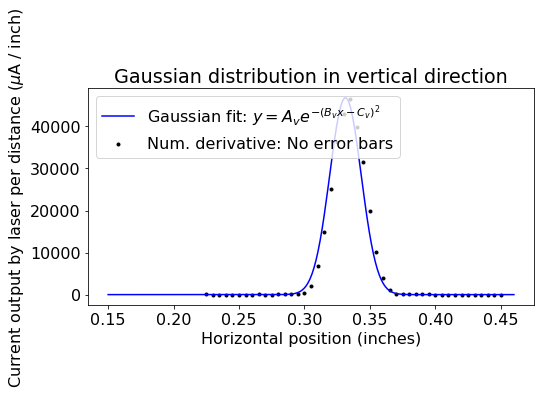

In [352]:
'''Numerical differentiation of ERFC - Vertical'''

# Using backward difference numerical derivative

backwardD_v = [0.0] * len(xData_v)
backwardD_v[0] = (yData_v[1] - yData_v[0])/(xData_v[1] - xData_v[0])
for i in range (1, len(yData_v)):
    backwardD_v[i] = -1 * (yData_v[i] - yData_v[i - 1])/(xData_v[i] - xData_v[i - 1])

plt.scatter(xData_v, backwardD_v, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_v * np.exp(-(B_v * x - C_v) ** 2), 'b'
         ,label= r'Gaussian fit: $y = A_{v} e^{-\left(B_{v} x - C_{v}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in vertical direction')
plt.legend(loc = 2)
plt.show()

## --Using central difference
$f′(x_j)=\frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

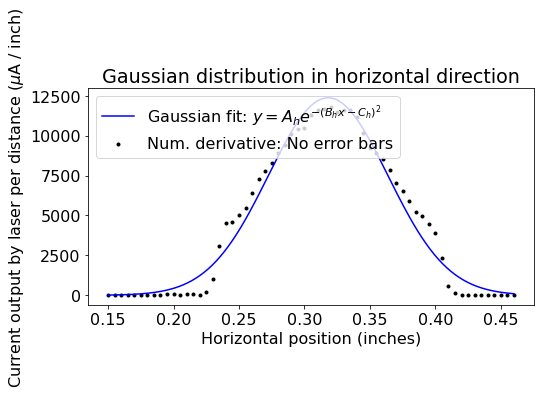

In [353]:
'''Numerical differentiation of ERFC - Horizontal'''

# Using central difference numerical derivative
### Endpoints not included

centralD_h = [0.0] * len(xData_h)
# centralD_h[0] = (yData_h[0] - yData_h[1])/(xData_h[0] - xData_h[1])
for i in range (1, len(yData_h) - 1):
    centralD_h[i] = -1 * (yData_h[i + 1] - yData_h[i - 1])/(xData_h[i + 1] - xData_h[i - 1])
# centralD_h[-1] = (yData_h[-1] - yData_h[-2])/(xData_h[-1] - xData_h[-2])

plt.scatter(xData_h, centralD_h, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_h * np.exp(-(B_h * x - C_h) ** 2), 'b'
          ,label= r'Gaussian fit: $y = A_{h} e^{-\left(B_{h} x - C_{h}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
plt.legend(loc = 2)
plt.show()

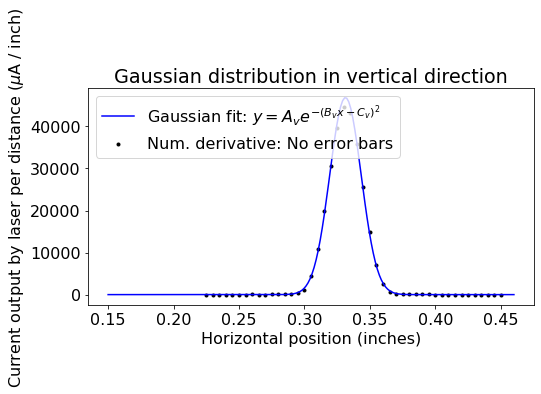

In [354]:
'''Numerical differentiation of ERFC - Vertical'''

# Using central difference numerical derivative
### Endpoints not included

centralD_v = [0.0] * len(xData_v)
# centralD_v[0] = (yData_v[0] - yData_v[1])/(xData_v[0] - xData_v[1])
for i in range (1, len(yData_v) - 1):
    centralD_v[i] = -1 * (yData_v[i + 1] - yData_v[i - 1])/(xData_v[i + 1] - xData_v[i - 1])
# centralD_v[-1] = (yData_v[-1] - yData_v[-2])/(xData_v[-1] - xData_v[-2])

plt.scatter(xData_v, centralD_v, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, A_v * np.exp(-(B_v * x - C_v) ** 2), 'b'
         ,label= r'Gaussian fit: $y = A_{v} e^{-\left(B_{v} x - C_{v}\right)^{2}}$'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in vertical direction')
plt.legend(loc = 2)
plt.show()

# Fitting Gaussian to central difference, all num derv points

A_h2 = 12052.5, B_h2 = 14.69, C_h2 = 4.679
Standard deviations: σA_h2 = 203.2, σB_h2 = 0.29, σC_h2 = 0.092


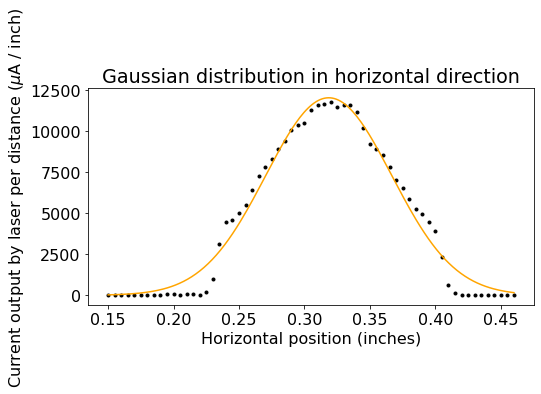

In [355]:
'''Fitting Gaussian to numerical differentiation (central difference) data - Horizontal'''

def fit_function(x, A_h2, B_h2, C_h2):
    return A_h2 * np.exp(-(B_h2 * x - C_h2)**2)

popt_h2, pcov_h2 = curve_fit(fit_function, xData_h, centralD_h, bounds = ([12000, 10, 3], [13000, 15, 8]))
value_h2 = tuple(popt_h2)
print(f'A_h2 = {value_h2[0]:{1}.{6}}, B_h2 = {value_h2[1]:{1}.{4}}, C_h2 = {value_h2[2]:{1}.{4}}')

standard_div_h2 = tuple(np.sqrt(np.diag(pcov_h2)))
print(f'Standard deviations: σA_h2 = {standard_div_h2[0]:{1}.{4}}, σB_h2 = {standard_div_h2[1]:{1}.{2}}, σC_h2 = {standard_div_h2[2]:{1}.{2}}' 
      )

plt.scatter(xData_h, centralD_h, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, fit_function(x, *popt_h2), 'ORANGE',
          label= r'Fit from numerical derivative'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
# plt.legend(loc = 2)
plt.show()

A_v2 = 45292.9, B_v2 = 56.41, C_v2 = 18.69
Standard deviations: σA_v2 = 176.1, σB_v2 = 0.25, σC_v2 = 0.084


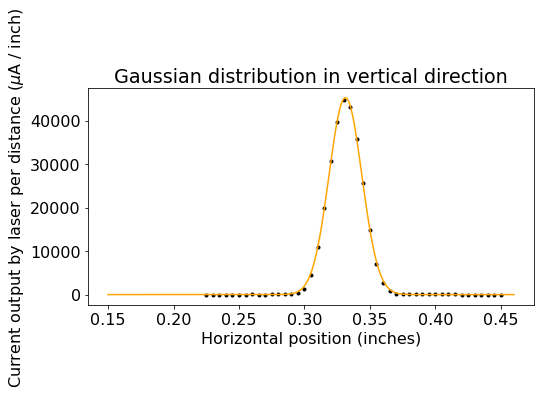

In [356]:
'''Fitting Gaussian to numerical differentiation (central difference) data - Vertical'''

def fit_function(x, A_v2, B_v2, C_v2):
    return A_v2 * np.exp(-(B_v2 * x - C_v2)**2)

popt_v2, pcov_v2 = curve_fit(fit_function, xData_v, centralD_v, bounds = ([45000, 50, 10], [48000, 70, 30]))
value_v2 = tuple(popt_v2)
print(f'A_v2 = {value_v2[0]:{1}.{6}}, B_v2 = {value_v2[1]:{1}.{4}}, C_v2 = {value_v2[2]:{1}.{4}}')

standard_div_v2 = tuple(np.sqrt(np.diag(pcov_v2)))
print(f'Standard deviations: σA_v2 = {standard_div_v2[0]:{1}.{4}}, σB_v2 = {standard_div_v2[1]:{1}.{2}}, σC_v2 = {standard_div_v2[2]:{1}.{2}}' 
      )

plt.scatter(xData_v, centralD_v, c='k', marker='.'
            , label='Num. derivative: No error bars'
           )

plt.plot(x, fit_function(x, *popt_v2), 'ORANGE',
          label= r'Fit from numerical derivative'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in vertical direction')
# plt.legend(loc = 2)
plt.show()

# Fitting Gaussian to central difference, only points within "ring"

A_h3 = 11674.8, B_h3 = 13.43, C_h3 = 4.277
Standard deviations: σA_h3 = 76.82, σB_h3 = 0.16, σC_h3 = 0.052


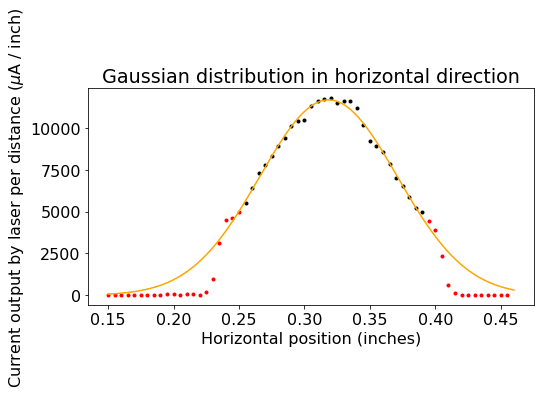

In [386]:
'''Fitting Gaussian to numerical differentiation (central difference) data - Horizontal'''

def fit_function(x, A_h3, B_h3, C_h3):
    return A_h3 * np.exp(-(B_h3 * x - C_h3)**2)

popt_h3, pcov_h3 = curve_fit(fit_function, xData_h[21:-14], centralD_h[21:-14],
                             bounds = ([10000, 0, 0], [14000, 15, 15]))

value_h3 = tuple(popt_h3)
print(f'A_h3 = {value_h3[0]:{1}.{6}}, B_h3 = {value_h3[1]:{1}.{4}}, C_h3 = {value_h3[2]:{1}.{4}}')

standard_div_h3 = tuple(np.sqrt(np.diag(pcov_h3)))
print(f'Standard deviations: σA_h3 = {standard_div_h3[0]:{1}.{4}}, σB_h3 = {standard_div_h3[1]:{1}.{2}}, σC_h3 = {standard_div_h3[2]:{1}.{2}}' 
      )

plt.scatter(xData_h[0:21], centralD_h[0:21], c='r', marker='.')
plt.scatter(xData_h[21:-14], centralD_h[21:-14], c='k', marker='.'
            , label='Num. derivative: No error bars'
           )
plt.scatter(xData_h[-14:-1], centralD_h[-14:-1], c='r', marker='.')

plt.plot(x, fit_function(x, *popt_h3), 'ORANGE'
         , label= r'Fit from numerical derivative'
        )

plt.xlabel('Horizontal position (inches)')
plt.ylabel('Current output by laser per distance ($\mu$A / inch)')
plt.title('Gaussian distribution in horizontal direction')
# plt.legend(loc = 2)
plt.show()

# Finding laser profile radii
## --Uses principle $\frac{1}{e^{2}}\approx 13.534\%$ of maximum intensity is location of $\sigma_{0}$, beam radius
## Horizontal / oblong radius

In [391]:
# Max_h = A_h
# Cutoff_h = 0.13534 * Max_h
# print(Cutoff_h)
# print('\n')

'''Find beam radius, aka $\sigma_{0}$'''
## Note: uses Gaussian from ERFC parameters

# Left bound of beam
x1_h = (C_h - np.sqrt(2)) / B_h
# Right bound of beam
x2_h = (C_h + np.sqrt(2)) / B_h

# Radius of beam
Radius_h = (x2_h - x1_h) / 2

# Center of beam
Center_h = (x1_h + x2_h) / 2

print("Beam in horizontal direction, i.e. oblong direction; all units in inches")
print("Left bound: %f" % x1_h)
print("Right bound: %f" % x2_h)
print("Center: %f" % Center_h)
print("\nHorizontal beam radius: %f inches" % Radius_h)

Beam in horizontal direction, i.e. oblong direction; all units in inches
Left bound: 0.226747
Right bound: 0.409404
Center: 0.318076

Horizontal beam radius: 0.091328 inches


## Vertical / short radius

In [358]:
# Max_v = A_v
# Cutoff_v = 0.13534 * Max_v
# print(Cutoff_v)
# print('\n')

'''Find beam radius, aka $\sigma_{0}$'''
## Note: uses Gaussian from ERFC parameters

# Left bound of beam
x1_v = (C_v - np.sqrt(2)) / B_v
# Right bound of beam
x2_v = (C_v + np.sqrt(2)) / B_v

# Radius of beam
Radius_v = (x2_v - x1_v) / 2

# Center of beam
Center_v = (x1_v + x2_v) / 2

print("Beam in vertical direction, i.e. short direction; all units in inches")
print("Left bound: %f" % x1_v)
print("Right bound: %f" % x2_v)
print("Center: %f" % Center_v)
print("\nVertical beam radius: %f inches" % Radius_v)

Beam in vertical direction, i.e. short direction; all units in inches
Left bound: 0.307232
Right bound: 0.355364
Center: 0.331298

Vertical beam radius: 0.024066 inches


# Possible laser profile
## Edge is the location of arbitrary beam radius $\sigma_{0}$

Width: 0.463948 cm
Height: 0.122256 cm


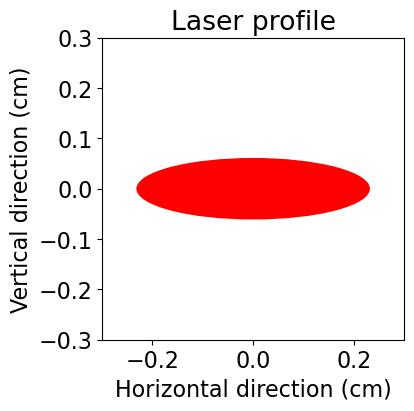

In [389]:
from matplotlib.patches import Ellipse

Width = 2*Radius_h*2.54
Height = 2*Radius_v*2.54

print('Width: %f cm' % Width)
print('Height: %f cm' % Height)

plt.figure(figsize=(4,4), dpi = 100)
ax = plt.gca()

Laser = Ellipse(xy=(0, 0), width=Width, height=Height,
                edgecolor='r', fc='r', lw=0)
        
ax.add_patch(Laser)

ax.set_xlim(-0.3, 0.3)
ax.set_ylim(-0.3, 0.3)
ax.set_aspect('equal', adjustable='box')

plt.xlabel('Horizontal direction (cm)')
plt.ylabel('Vertical direction (cm)')
plt.title('Laser profile')
plt.show()

According to Thorlabs, beam is Elliptical, 4.5 mm x 1.0 mm, and The $\frac{1}{e^{2}}$ beam size was measured at a distance of 2" (50.8 mm) from the front of the housing. My profile is quite close!!!